<h1>Loss Functions</h1>

In [20]:
import numpy as np
import matplotlib.pyplot as plt

y_true = np.array([1, 0, 1, 0] * 25)
y_pred = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<h2>Mean Squared Error</h2>
<!-- <ul>
  <li><strong>Mean Squared Error (MSE)</strong>: <br> \[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \] </li>
  <li><strong>Mean Absolute Error (MAE)</strong>: <br> \[ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \] </li>
  <li><strong>Cross-Entropy Loss</strong>: <br> \[ \text{Cross-Entropy} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i) \] </li>
  <li><strong>Hinge Loss</strong>: <br> \[ \text{Hinge Loss} = \max(0, 1 - y_i \hat{y}_i) \] </li>
  <li><strong>Huber Loss</strong>: <br> \[ \text{Huber Loss} = \begin{cases} 
  \frac{1}{2}(y_i - \hat{y}_i)^2 & \text{for } |y_i - \hat{y}_i| \leq \delta \\
  \delta \cdot |y_i - \hat{y}_i| - \frac{1}{2}\delta^2 & \text{otherwise} 
  \end{cases} \] </li>
  <li><strong>Log Loss</strong>: <br> \[ \text{Log Loss} = -\left( y \log(p) + (1 - y) \log(1 - p) \right) \] </li>
</ul> -->

<ul>
  <li><strong>Mean Squared Error (MSE)</strong>: <br> \[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \] </li>
</ul>
Commonly used in regression problems to measure the average squared difference between predicted and actual values.

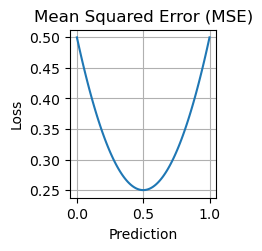

In [22]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse_values = [mse(y_true, np.full_like(y_pred, p)) for p in y_pred]

plt.subplot(2, 3, 1)
plt.plot(y_pred, mse_values, label='MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.grid(True)

<h2>Mean Absolute Error</h2>
 <ul>
  <li><strong>Mean Absolute Error (MAE)</strong>: <br> \[ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \] </li>
</ul> 
 Also used in regression tasks, focusing on the average absolute difference between predicted and actual values. It's more robust to outliers compared to MSE.

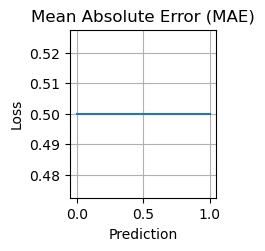

In [28]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae_values = [mae(y_true, np.full_like(y_pred, p)) for p in y_pred]

plt.subplot(2, 3, 1)
plt.plot(y_pred, mae_values, label='MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.grid(True)

<h2>Cross - Entropy Loss</h2>
<ul>
  <li><strong>Cross-Entropy Loss</strong>: <br> \[ \text{Cross-Entropy} = -\sum_{i=1}^{n} y_i \log(\hat{y}_i) \] </li>
</ul>

Used in classification problems, particularly in logistic regression and neural networks, to measure the performance of classification models whose output is a probability value.

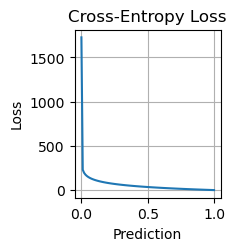

In [32]:
def cross_entropy(y_true, y_pred):
    # Avoid log(0) by adding a small epsilon value
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred))

cross_entropy_values = [cross_entropy(y_true, np.full_like(y_pred, p)) for p in y_pred]

plt.subplot(2, 3, 3)
plt.plot(y_pred, cross_entropy_values, label='Cross-Entropy')
plt.title('Cross-Entropy Loss')
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.grid(True)

<h2>Hinge Loss</h2>
<ul>

  <li><strong>Hinge Loss</strong>: <br> \[ \text{Hinge Loss} = \max(0, 1 - y_i \hat{y}_i) \] </li>

</ul>

Used in support vector machines (SVM) for binary classification tasks. It helps in maximizing the margin between classes.

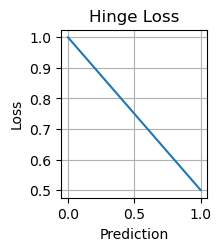

In [34]:
def hinge_loss(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))
hinge_loss_values = [hinge_loss(y_true, np.full_like(y_pred, p)) for p in y_pred]
plt.subplot(2, 3, 4)
plt.plot(y_pred, hinge_loss_values, label='Hinge Loss')
plt.title('Hinge Loss')
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.grid(True)

<h2>Huber Loss</h2>
<ul>

  <li><strong>Huber Loss</strong>: <br> \[ \text{Huber Loss} = \begin{cases} 
  \frac{1}{2}(y_i - \hat{y}_i)^2 & \text{for } |y_i - \hat{y}_i| \leq \delta \\
  \delta \cdot |y_i - \hat{y}_i| - \frac{1}{2}\delta^2 & \text{otherwise} 
  \end{cases} \] </li>

</ul>
Combines properties of MSE and MAE. It's used in regression tasks and is less sensitive to outliers than MSE while being smoother than MAE.

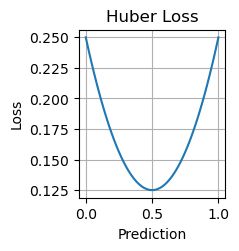

In [36]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = np.abs(y_true - y_pred)
    return np.mean(np.where(error < delta, 0.5 * (error ** 2), delta * error - 0.5 * (delta ** 2)))
huber_loss_values = [huber_loss(y_true, np.full_like(y_pred, p)) for p in y_pred]
plt.subplot(2, 3, 5)
plt.plot(y_pred, huber_loss_values, label='Huber Loss')
plt.title('Huber Loss')
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.grid(True)

<h2>Log Loss</h2>
<ul>
  <li><strong>Log Loss</strong>: <br> \[ \text{Log Loss} = -\left( y \log(p) + (1 - y) \log(1 - p) \right) \] </li>
</ul>
Similar to cross-entropy loss, often used in binary classification tasks to evaluate the performance of a model based on probabilities.

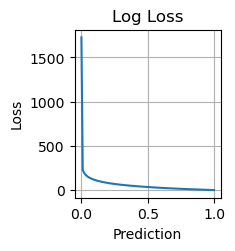

In [38]:
def log_loss(y_true, y_pred):
    # Same as cross-entropy in binary classification
    return cross_entropy(y_true, y_pred)

log_loss_values = [log_loss(y_true, np.full_like(y_pred, p)) for p in y_pred]
plt.subplot(2, 3, 6)
plt.plot(y_pred, log_loss_values, label='Log Loss')
plt.title('Log Loss')
plt.xlabel('Prediction')
plt.ylabel('Loss')
plt.grid(True)